In [ ]:
%pip install pandas seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [241]:
sns.set(style="ticks")
plt.style.use("fivethirtyeight")

warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
dfpokemon = pd.read_csv('pokemon_data.csv')
dfpokemon.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [233]:
dftitanic = pd.read_csv('titanic.csv')

print(f"Shape : {dftitanic.shape}\n=================================")
# print(f"Info : {dftitanic.info}\n=================================")

# print(dftitanic.info())
# print(dftitanic['Sex'].unique())

# dftitanic['Sex'] = dftitanic['Sex'].replace(['fimale'], 'female')
# dftitanic['Pclass'] = dftitanic['Pclass'].astype(int)

dftitanic['sex'].unique()
# dftitanic['Age'].agg([np.sum])
# dftitanic['Age'].mean()
# np.mean(dftitanic.Age)

# display(dftitanic.dtypes)

print(dftitanic.age.mean())
print(dftitanic.age.mean(axis=0))
print(dftitanic.age.median())

# dftitanic = dftitanic[~dftitanic.age.isnull()]
print(f"x {dftitanic.age.sum() / dftitanic.age.count()}")

Shape : (1309, 9)
29.881137667304014
29.881137667304014
28.0
x 29.881137667304014


<AxesSubplot: >

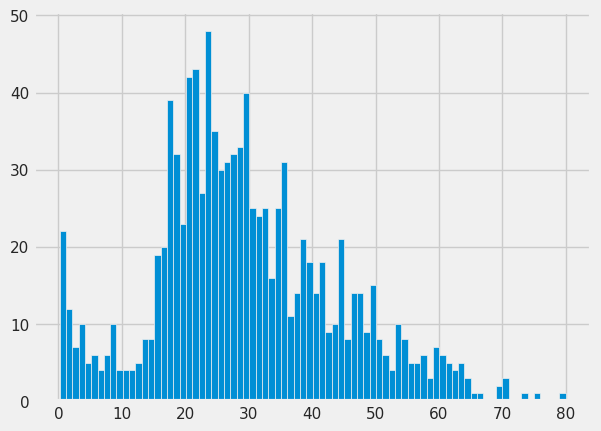

In [234]:
dftitanic.age.hist(bins=80)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

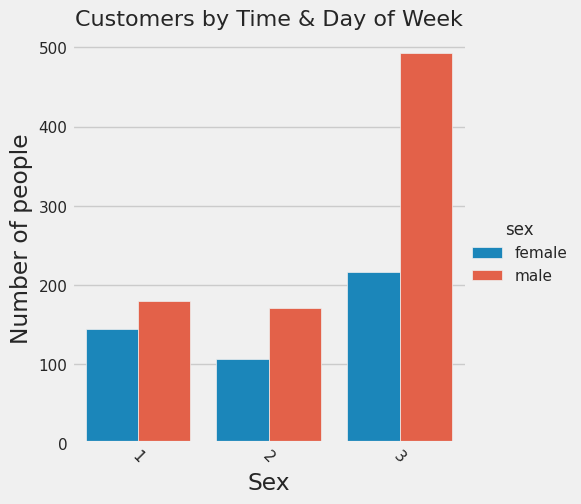

In [213]:

# sns.catplot(data=dftitanic, x='sex', kind='count')
sns.catplot(data=dftitanic, x='pclass', hue='sex', kind='count')

plt.title('Customers by Time & Day of Week', fontsize=16)
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.xticks(rotation=-45)

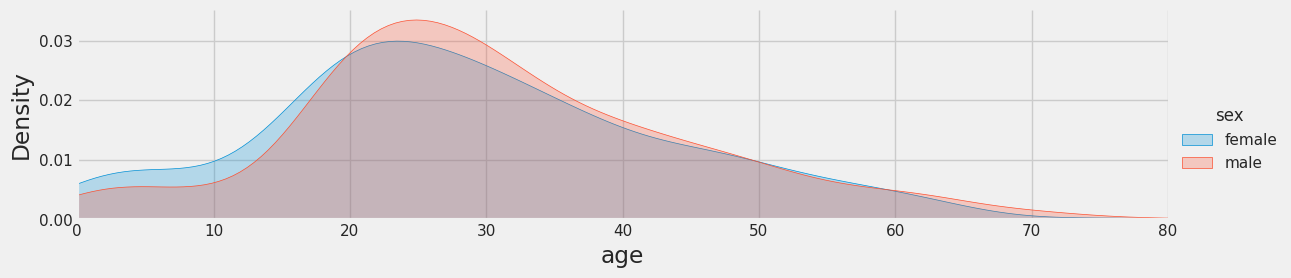

In [246]:
fig = sns.FacetGrid(dftitanic, hue="sex", aspect=4)
fig.map(sns.kdeplot, 'age', fill=True)

oldest = dftitanic['age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

D7


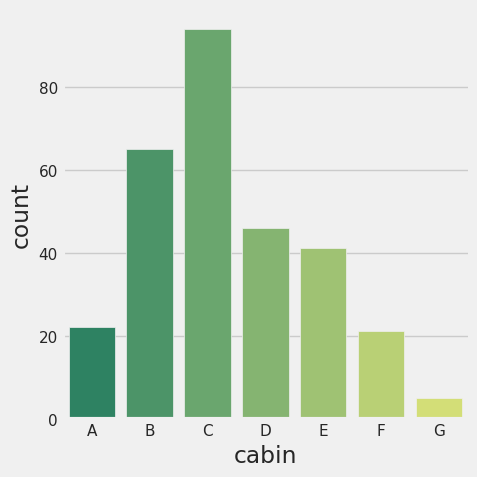

In [277]:
deck = dftitanic['cabin'].dropna()

print(deck[6])

levels = [level[0] for level in deck]

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['cabin']
cabin_df.sort_values(by='cabin', inplace=True)

cabin_df = cabin_df[~(cabin_df.cabin == 'T')]

sns.catplot(data=cabin_df, x='cabin', kind='count', palette='summer')

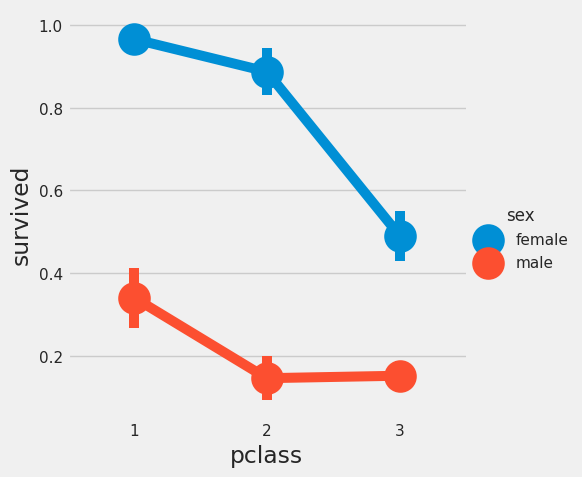

In [274]:
sns.catplot(x='pclass', y='survived', data=dftitanic, kind='point', hue='sex')